# Notebook to reproduce _Figure 4_

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import plot_settings
import plot_utils

In [3]:
fig_dir = 'figure_4/'

In [4]:
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

In [10]:
def compute_results(taskname):
    df = pd.read_csv('results/LINCS/model_performance:{}.csv'.format(taskname))
    
    cvae_results = []
    sagittarius_results = []
    for dr in np.unique(df['target drug'].tolist()):
        cvae_results.append(np.mean(
            df[(df['model'] == 'cvae') & (df['target drug'] == dr)]['Spearman correlation']))
        sagittarius_results.append(np.mean(
            df[(df['model'] == 'Sagittarius') & (df['target drug'] == dr)]['Spearman correlation']))
    return cvae_results, sagittarius_results

In [12]:
def make_task_scatterplot(taskname):
    cvae_results, sagittarius_results = compute_results(taskname)
    ax = plot_settings.get_square_axis()
    plot_utils.scatter_plot(
        ax=ax, xs=cvae_results, ys=sagittarius_results, xlabel='cVAE Spearman',
        ylabel='Sagittarius Spearman',
        size=10, color='white', alpha=0.6)
    x0, x1 = ax.get_xlim()
    y0, y1 = ax.get_ylim()
    min0 = min(x0, y0)
    max1 = max(x1, y1)
    ax.set_xlim(min0, max1)
    ax.set_ylim(min0, max1)
    plot_utils.show_x_equals_y(ax, color='gray', domain=(min0, max1))
    plot_utils.align_axes_ticks(ax, use_y=False, ticks_to_use=[0.7, 0.8, 0.9, 1.0])
    plot_utils.format_ax(ax)

# Code to reproduce Figure 4c-e

Fig. 4c

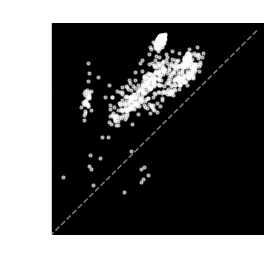

In [15]:
%matplotlib inline

make_task_scatterplot('completeGeneration')
plt.title('Complete Generation')
plt.tight_layout()
plt.savefig(fig_dir + 'figure_4c.pdf')

Fig. 4d

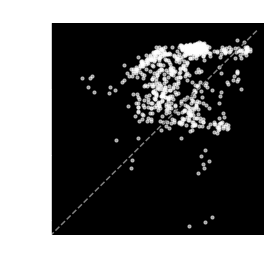

In [17]:
make_task_scatterplot('combinationAndDose')
plt.title('Combination & Dose')
plt.tight_layout()
plt.savefig(fig_dir + 'figure_4d.pdf')

Fig. 4e

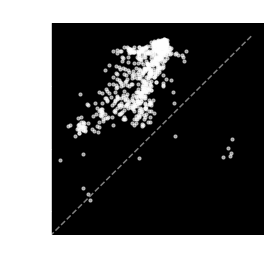

In [18]:
make_task_scatterplot('combinationAndTime')
plt.title('Combination & Time')
plt.tight_layout()
plt.savefig(fig_dir + 'figure_4e.pdf')